In [ ]:
'''

Práctica 1

Briones Cruz, Juan Carlos
Alvaréz García, Brandon Azarael

6CV3

'''

In [2]:
# Importación de cada una de las bibliotecas las cuales tendrán las herramientas a usar

%matplotlib inline
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imblearn
from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

from sklearn.impute import SimpleImputer

In [3]:
# Método con el cual podemos obtener los datos de nuestro csv desde DRIVE

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Iris-Setosa -> 1:50
# Iris-Versicolor -> 50:80
# Iris-Virginica -> 80:111


IrisDB = pd.read_csv("/content/drive/MyDrive/P1 ML/IrisPlant_modificada.csv")
print(type(IrisDB))

<class 'pandas.core.frame.DataFrame'>


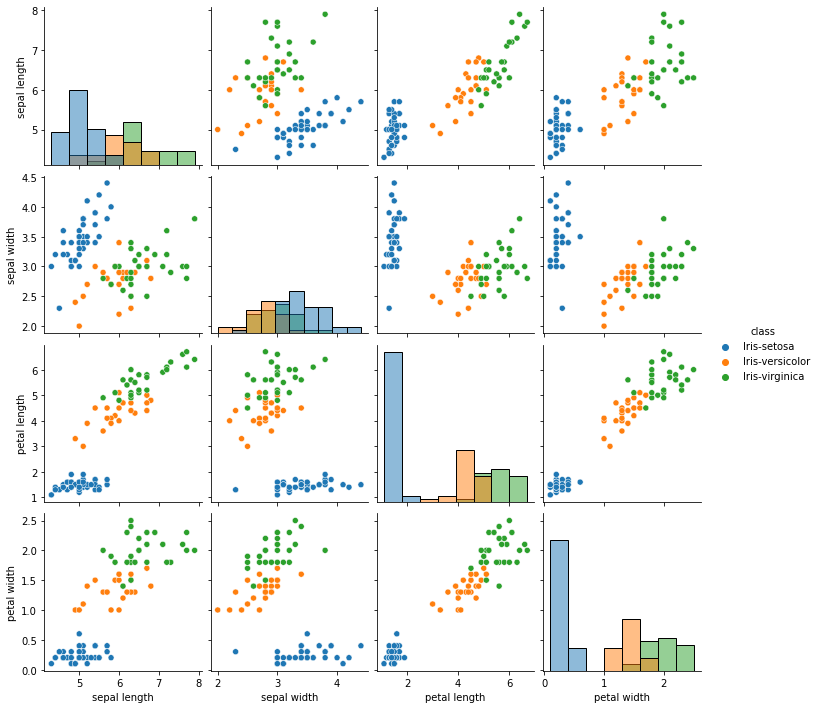

In [5]:
# Plotter de las clases con los respectivos rasgos y la frecuencia de estas

sns.pairplot(IrisDB, hue="class", diag_kind="hist")

In [6]:
#impresión banco de datos (Iris-virginica)

print(IrisDB.iloc[80:115,:])

     sepal length  sepal width  petal length  petal width           class
80            6.3          3.3           6.0          2.5  Iris-virginica
81            5.8          2.7           NaN          1.9  Iris-virginica
82            7.1          3.0           5.9          2.1  Iris-virginica
83            6.3          2.9           5.6          1.8  Iris-virginica
84            6.5          3.0           5.8          2.2  Iris-virginica
85            7.6          3.0           6.6          2.1  Iris-virginica
86            NaN          2.5           4.5          1.7  Iris-virginica
87            7.3          2.9           6.3          1.8  Iris-virginica
88            6.7          2.5           5.8          1.8  Iris-virginica
89            7.2          3.6           6.1          NaN  Iris-virginica
90            6.5          3.2           5.1          2.0  Iris-virginica
91            6.9          3.2           NaN          2.3  Iris-virginica
92            5.6          2.8        

In [ ]:
#Impresion banco de datos (Iris-setosa)
print(IrisDB.iloc[1:50,:])

In [ ]:
#impresion banco de datos (Iris-versicolor)
print(IrisDB.iloc[51:80,:])

In [7]:
#Realizar imputación por clases son SimpleImputer()

si = SimpleImputer(strategy="mean")

In [8]:
#Imputado de datos de (Irsi-virginica)
virginica=si.fit_transform(IrisDB.iloc[80:115,0:4]).round(2)

#Imputado de datos de (Iris-setosa)
setosa=si.fit_transform(IrisDB.iloc[0:50,0:4]).round(2)

#Imputado de datos de (Iris-versicolor)
versicolor=si.fit_transform(IrisDB.iloc[50:80,0:4]).round(2)

In [ ]:
#Impresion del banco de datos ya con datos imputados (por clase)

print(f"\n\nVirginica\n{setosa}\n\nSetosa\n{setosa}\n\nVersicolor\n{versicolor}")



Virginica
[[5.1  3.5  1.4  0.2 ]
 [5.02 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [4.6  3.44 1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.3 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  3.44 1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.24]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.48 0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.4 ]
 [5.02 3.5  1.4  0.3 ]
 [5.7  3.8  1.7  0.3 ]
 [5.1  3.8  1.5  0.3 ]
 [5.4  3.44 1.7  0.2 ]
 [5.1  3.7  1.5  0.4 ]
 [4.6  3.6  1.48 0.2 ]
 [5.1  3.3  1.7  0.24]
 [4.8  3.44 1.9  0.2 ]
 [5.   3.   1.6  0.2 ]
 [5.   3.4  1.6  0.4 ]
 [5.2  3.5  1.5  0.2 ]
 [5.2  3.4  1.4  0.2 ]
 [4.7  3.44 1.6  0.2 ]
 [4.8  3.1  1.6  0.2 ]
 [5.4  3.4  1.5  0.4 ]
 [5.2  4.1  1.5  0.1 ]
 [5.5  4.2  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.   3.2  1.2  0.2 ]
 [5.5  3.5  1.3  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.02 3.   1.3  0.2 ]
 [5.1  3.4  1.5  0.2 ]
 [5.   3.5  1.3  0.3 ]
 [4.5  2.3  1.3  0.3 ]
 [4.4  3.2  1.3  0.2 ]

In [9]:
# Funcion para mostrar los valores atipicos de clase tomando como parametro el array y los límites inferiores y superiores que obtendremos más adelante

def print_atypical_values(array,inf,sup):
    for i in array:
        if i <= inf or i >= sup:
            print(i)
        else:
            continue

In [10]:
#Detección de valores atipicos(Iris-Virginica)

#Desviación estandar

def atypicalValuesSetosa(x):

  vestandar = x.std(axis=0).round(3)

  df = pd.DataFrame(x,columns=["0","1","2","3"])

  #Media
  mediaancho=(df['0'].mean()).round(2)

  print("Desv estandar\n")
  print(vestandar)
  print(f"\nMedia ancho sepalo: {mediaancho} ")

  #Limites
  sup = (mediaancho + vestandar[0]).round(2)
  inf = (mediaancho - vestandar[0]).round(2)
  print(f"Valores aceptados ancho sepalo: [{inf},{sup}]")

  print(f"\n\nValores atipicos setosa (No aceptados)")
  valores = np.array(df['0'])
  print_atypical_values(valores,inf,sup)

def atypicalValuesVirginica(x):

  vestandar = x.std(axis=0).round(3)

  df = pd.DataFrame(x,columns=["0","1","2","3"])

  #Media
  mediaancho=(df['0'].mean()).round(2)

  print("Desv estandar\n")
  print(vestandar)
  print(f"\nMedia ancho sepalo: {mediaancho} ")

  #Limites
  sup = (mediaancho + vestandar[0]).round(2)
  inf = (mediaancho - vestandar[0]).round(2)
  print(f"Valores aceptados ancho sepalo: [{inf},{sup}]")

  print(f"\n\nValores atipicos virginica (No aceptados)")
  valores = np.array(df['0'])
  print_atypical_values(valores,inf,sup)

def atypicalValuesVersicolor(x):

  vestandar = x.std(axis=0).round(3)

  df = pd.DataFrame(x,columns=["0","1","2","3"])

    #Media
  mediaancho=(df['0'].mean()).round(2)

  print("Desv estandar\n")
  print(vestandar)
  print(f"\nMedia ancho sepalo: {mediaancho} ")

    #Limites
  sup = (mediaancho + vestandar[0]).round(2)
  inf = (mediaancho - vestandar[0]).round(2)
  print(f"Valores aceptados ancho sepalo: [{inf},{sup}]")

  print(f"\n\nValores atipicos versicolor (No aceptados)")
  valores = np.array(df['0'])
  print_atypical_values(valores,inf,sup)


In [11]:
# Mostramos los datos de la desviación estandar por rasgo, la media del rasgo que seleccionamos 
# (ancho sépalo), el intervalo y los valores del rasgo que resultan atípicos (clase setosa)

atypicalValuesSetosa(setosa)

Desv estandar

[0.337 0.363 0.154 0.097]

Media ancho sepalo: 5.02 
Valores aceptados ancho sepalo: [4.68,5.36]


Valores atipicos setosa (No aceptados)
4.6
5.4
4.6
4.4
5.4
4.3
5.8
5.7
5.4
5.7
5.4
4.6
5.4
5.5
5.5
4.5
4.4
4.6


In [12]:
# Mostramos los datos de la desviación estandar por rasgo, la media del rasgo que seleccionamos 
# (ancho sépalo), el intervalo y los valores del rasgo que resultan atípicos (clase setosa)

atypicalValuesVirginica(virginica)

Desv estandar

[0.577 0.299 0.528 0.249]

Media ancho sepalo: 6.63 
Valores aceptados ancho sepalo: [6.05,7.21]


Valores atipicos virginica (No aceptados)
5.8
7.6
7.3
5.6
7.7
7.9
7.7
6.0
5.9


In [13]:
atypicalValuesVersicolor(versicolor)

Desv estandar

[0.483 0.278 0.463 0.187]

Media ancho sepalo: 5.95 
Valores aceptados ancho sepalo: [5.47,6.43]


Valores atipicos versicolor (No aceptados)
4.9
5.2
5.0
6.7
6.8
6.7
5.4
6.7
5.1


In [14]:
# Métodos para calcular la longitud de la clase 

lenSetosa = len(setosa)
lenVersicolor = len(versicolor)
lenVirgilica = len(virginica)
arrPlants = [setosa, virginica, versicolor]



arrValues = [lenSetosa, lenVersicolor, lenVirgilica]

In [15]:
#Calculo de IR

Ir = (max(arrValues)/min(arrValues))
print(f"\nIR\n{Ir}")


IR
1.6666666666666667


In [16]:
# Conversión del array numpy -> dataframe para su mejor manipulación con funciones siguientes

dFrameSetosa = pd.DataFrame(setosa, columns = ["sepal length", "sepal width", "petal length", "petal width"])
dFrameSetosa.insert(4, "class", "iris setosa", allow_duplicates=False)

dFrameVirginica = pd.DataFrame(virginica, columns = ["sepal length", "sepal width", "petal length", "petal width"])
dFrameVirginica.insert(4, "class", "iris virginica", allow_duplicates=False)

dFrameVersicolor = pd.DataFrame(versicolor, columns = ["sepal length", "sepal width", "petal length", "petal width"])
dFrameVersicolor.insert(4, "class", "iris versicolor", allow_duplicates=False)

dFrameConcat = pd.concat([dFrameSetosa, dFrameVirginica, dFrameVersicolor])

dFrameConcat.to_csv("dFrame-CSV.csv", index=False, encoding="utf-8")


# Impresión que nos permite ver la forma del dataframe que contiene las clases c/ insersión ya concatenadas

print(dFrameConcat.shape)

(111, 5)


In [17]:
# Resultado de la concatenación mostrada en tabla

dFrameConcat.head()

,sepal length,sepal width,petal length,petal width,class
0,5.10,3.50,1.4,0.2,iris setosa
1,5.02,3.00,1.4,0.2,iris setosa
2,4.70,3.20,1.3,0.2,iris setosa
3,4.60,3.44,1.5,0.2,iris setosa
4,5.00,3.60,1.4,0.2,iris setosa


In [18]:
sm = SMOTE(sampling_strategy="not majority", random_state=60)

x = dFrameConcat.drop('class', axis=1)
y = dFrameConcat['class']

x_after, y_after = sm.fit_resample(x, y)

print(f"X antes de SMOTE {x.shape}")
print(f"X despues de SMOTE {x_after.shape}")

# Mostramos la distribución que tiene nuestra clase pre-oversampling

y.value_counts(sort=True)

# Mostramos la distribución que obtuvimos al hacer el oversampling (sampling_strategy = not majority)

y_after.value_counts(sort=True)

X antes de SMOTE (111, 4)
X despues de SMOTE (150, 4)


iris setosa        50
iris virginica     50
iris versicolor    50
Name: class, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

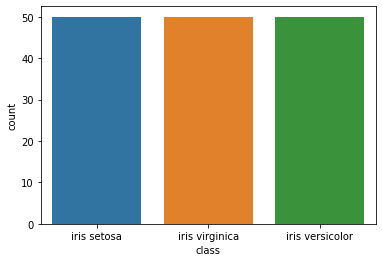

In [19]:
# Ploteo de la en forma gráfica de nuestros resultados finales por clase

sns.countplot(y_after)

     sepal length  sepal width  petal length  petal width           class
0        5.100000     3.500000      1.400000     0.200000     iris setosa
1        5.020000     3.000000      1.400000     0.200000     iris setosa
2        4.700000     3.200000      1.300000     0.200000     iris setosa
3        4.600000     3.440000      1.500000     0.200000     iris setosa
4        5.000000     3.600000      1.400000     0.200000     iris setosa
..            ...          ...           ...          ...             ...
145      6.522142     2.944646      5.800000     2.155717  iris virginica
146      6.461663     3.038337      5.315010     1.923327  iris virginica
147      6.346584     2.989772      5.302277     2.153416  iris virginica
148      6.751865     3.051865      5.301136     2.300000  iris virginica
149      7.746451     3.032255      6.630323     2.000000  iris virginica

[150 rows x 5 columns]


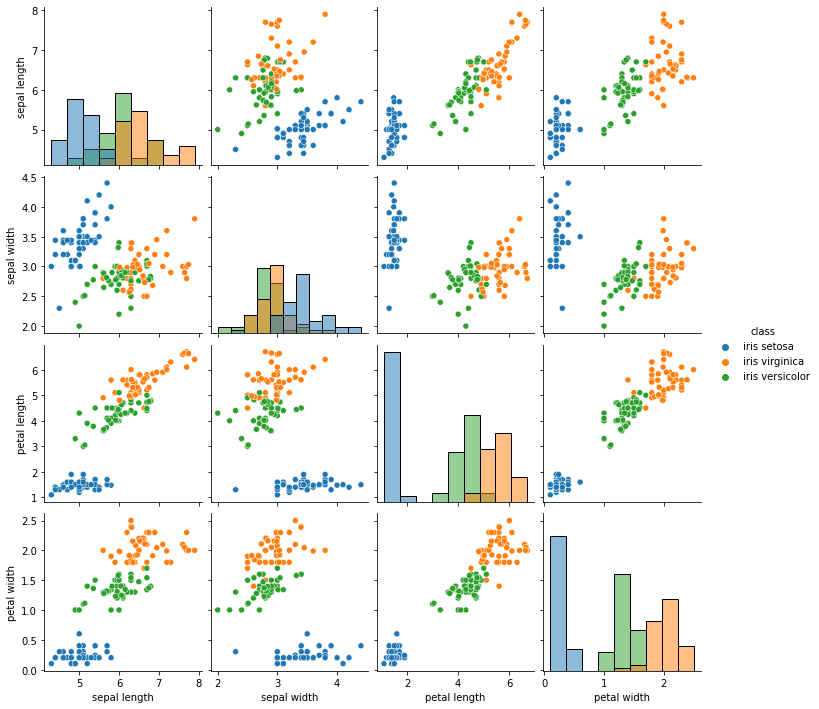

In [29]:
# Muestra (por tablas) y ploteo (por gráficas) del resultado post-oversampling
 
sns.pairplot(x_after, hue="class", diag_kind="hist")
print(x_after)
